<a href="https://colab.research.google.com/github/pddiste/pdds/blob/master/kats_co_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# For Google Colab:
!pip install kats
!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/air_passengers.csv
!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/multi_ts.csv



In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [3]:
try: # If running on Jupyter
    air_passengers_df = pd.read_csv("../kats/data/air_passengers.csv")
except FileNotFoundError: # If running on colab
    air_passengers_df = pd.read_csv("air_passengers.csv")

In [6]:
air_passengers_df.columns = ["time", "value"]
air_passengers_df.head()

,time,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
try: # If running on Jupyter
    multi_ts_df = pd.read_csv("../kats/data/multi_ts.csv", index_col=0)
except FileNotFoundError: # If running on colab
    multi_ts_df = pd.read_csv("multi_ts.csv", index_col=0)
multi_ts_df.columns = ["time", "v1", "v2"]
multi_ts_df.head()

,time,v1,v2
0,2017-03-12,-0.109,53.8
1,2017-03-13,0.000,53.6
2,2017-03-14,0.178,53.5
3,2017-03-15,0.339,53.5
4,2017-03-16,0.373,53.4


In [8]:
air_passengers_ts = TimeSeriesData(air_passengers_df)
multi_ts = TimeSeriesData(multi_ts_df)

In [9]:
# check that the type of the data is a "TimeSeriesData" object for both cases
print(type(air_passengers_ts))
print(type(multi_ts))

<class 'kats.consts.TimeSeriesData'>
<class 'kats.consts.TimeSeriesData'>


In [10]:
# For the air_passengers TimeSeriesData, check that both time and value are pd.Series
print(type(air_passengers_ts.time))
print(type(air_passengers_ts.value))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:


# For the multi_ts TimeSeriesData, time is a pd.Series and value is a pd.DataFrame
print(type(multi_ts.time))
print(type(multi_ts.value))



<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
air_passengers_ts[1:5]

,time,value
0,1949-02-01,118
1,1949-03-01,132
2,1949-04-01,129
3,1949-05-01,121


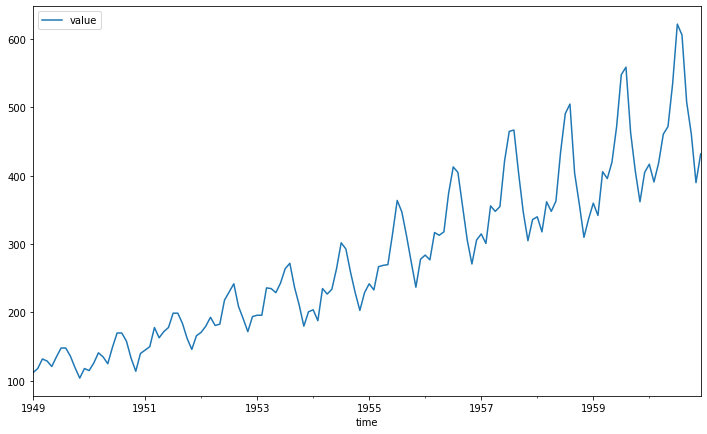

In [15]:
%matplotlib inline

# Must pass the name of the value columns to plot
air_passengers_ts.plot(cols=['value'])
plt.show()

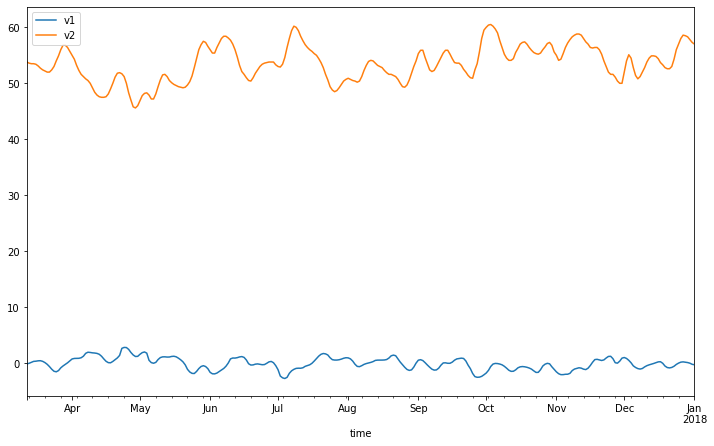

In [16]:
# We can plot multiple time series from multi_ts by passing in the name of each value column we want to plot
multi_ts.plot(cols=['v1','v2'])
plt.show()